In [1]:
import tensorflow as tf

## 基础介绍

TensorFlow的核心基础数据单元成为tensor

In [2]:
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0)
print(node1, node2)

Tensor("Const:0", shape=(), dtype=float32) Tensor("Const_1:0", shape=(), dtype=float32)


上面的语句只是定义了computational graph，并没有进行evaluate，要进行实际的值操作，需要将computational graph运行于session中

In [3]:
sess = tf.Session()
sess.run([node1,node2])

[3.0, 4.0]

In [4]:
from __future__ import print_function

node3 = tf.add(node1, node2)
print("node3:", node3)
print("sess.run(node3):", sess.run(node3))

node3: Tensor("Add:0", shape=(), dtype=float32)
sess.run(node3): 7.0


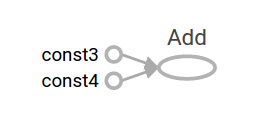

## tf.placeholder

上面的例子只能常量运算，我们更期望的是根据参数动态运算：

In [6]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

adder_node = a+b
print("a+b=",sess.run(adder_node,feed_dict={a:3, b:4}))
print("a+b=",sess.run(adder_node,feed_dict={a:[1,2], b:[3,4]}))

a+b= 7.0
a+b= [ 4.  6.]


## tf.Variable

In [7]:
W = tf.Variable([.3])
b = tf.Variable([-.3])
x = tf.placeholder(tf.float32)

linear_model = x*W + b

In [10]:
# 针对变量必须进行初始化
init = tf.global_variables_initializer()
sess.run(init)
print(sess.run(linear_model, feed_dict={x:[1,2,3,5]}))

[ 0.          0.30000001  0.60000002  1.20000005]


In [14]:
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(y - linear_model)
loss = tf.reduce_sum(squared_deltas)
print(sess.run(loss,{x:[1,3,5,6],y:[2,6,10,12]}))

5.51


In [18]:
fixW = tf.assign(W, [2.])
fixb = tf.assign(b, [0.])

sess.run([fixW, fixb])
print(sess.run(loss,{x:[1,3,5,6],y:[2,6,10,12]}))

0.0


## tf.train API

In [20]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

In [22]:
for i in range(100):
    sess.run(train,{x:[1,3,5,6],y:[2,6,10,12]})
    
print("after train, W is ",sess.run(W), ", b is ", sess.run(b))

after train, W is  [ 2.] , b is  [ 0.]


## tf.estimator